# 12. EDA 종합실습: Titanic 데이터 분석

**학습 목표**: pandas, matplotlib, numpy를 종합 활용하여 실제 데이터셋의 탐색적 데이터 분석(EDA)을 수행합니다.

---

## Titanic 데이터셋 소개

1912년 타이타닉호 침몰 사고의 승객 데이터입니다. 생존 여부를 예측하는 대표적인 머신러닝 입문 데이터셋입니다.

| 컬럼명 | 설명 |
|--------|------|
| PassengerId | 승객 ID |
| Survived | 생존 여부 (0=사망, 1=생존) |
| Pclass | 객실 등급 (1=1등석, 2=2등석, 3=3등석) |
| Name | 이름 |
| Sex | 성별 |
| Age | 나이 |
| SibSp | 동승한 형제/배우자 수 |
| Parch | 동승한 부모/자녀 수 |
| Ticket | 티켓 번호 |
| Fare | 운임 (영국 파운드) |
| Cabin | 선실 번호 |
| Embarked | 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton) |

---
## 12.1 데이터 로드 및 기본 탐색

### 12.1.1 라이브러리 임포트 및 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### 12.1.2 데이터 로드

In [2]:
# CSV 파일 로드
df = pd.read_csv("data/titanic.csv")

print(f"데이터 로드 완료!")
print(f"데이터 크기: {df.shape[0]}행 × {df.shape[1]}열")

데이터 로드 완료!
데이터 크기: 891행 × 12열


### 12.1.3 데이터 미리보기

In [3]:
# 처음 5개 행 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 마지막 5개 행 확인
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12.1.4 데이터 구조 파악

In [5]:
# 데이터 타입 및 결측치 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 컬럼 목록
print("컬럼 목록:")
print(df.columns.tolist())

컬럼 목록:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
# 데이터 타입별 컬럼 분류
print("\n수치형 컬럼:", df.select_dtypes(include=[np.number]).columns.tolist())
print("범주형 컬럼:", df.select_dtypes(include=['object']).columns.tolist())


수치형 컬럼: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
범주형 컬럼: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 12.1.5 기술 통계 확인

In [8]:
# 수치형 변수의 기술 통계
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 범주형 변수의 기술 통계
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


---
## 12.2 결측치 분석

### 12.2.1 결측치 현황 파악

In [10]:
# 컬럼별 결측치 개수
missing_count = df.isnull().sum()
print("컬럼별 결측치 개수:")
print(missing_count[missing_count > 0])

컬럼별 결측치 개수:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [11]:
# 결측치 비율 계산
missing_ratio = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    '결측치 수': missing_count,
    '결측치 비율(%)': missing_ratio
})
missing_df = missing_df[missing_df['결측치 수'] > 0].sort_values('결측치 비율(%)', ascending=False)
print("\n결측치 현황:")
print(missing_df)


결측치 현황:
          결측치 수  결측치 비율(%)
Cabin       687      77.10
Age         177      19.87
Embarked      2       0.22


### 12.2.3 결측치 분석 인사이트

**관찰 결과:**
- `Cabin`: 약 77%의 결측치 → 분석에서 제외하거나 '있음/없음'으로 변환 고려
- `Age`: 약 20%의 결측치 → 평균, 중앙값 또는 그룹별 대체 필요
- `Embarked`: 소수의 결측치 → 최빈값으로 대체 가능

---
## 12.3 범주형 변수 분석

### 12.3.1 타겟 변수: Survived (생존 여부)

In [13]:
# 생존 여부 분포
survived_counts = df['Survived'].value_counts()
survived_ratio = df['Survived'].value_counts(normalize=True) * 100

print("생존 여부 분포:")
print(f"  사망(0): {survived_counts[0]}명 ({survived_ratio[0]:.1f}%)")
print(f"  생존(1): {survived_counts[1]}명 ({survived_ratio[1]:.1f}%)")

생존 여부 분포:
  사망(0): 549명 (61.6%)
  생존(1): 342명 (38.4%)


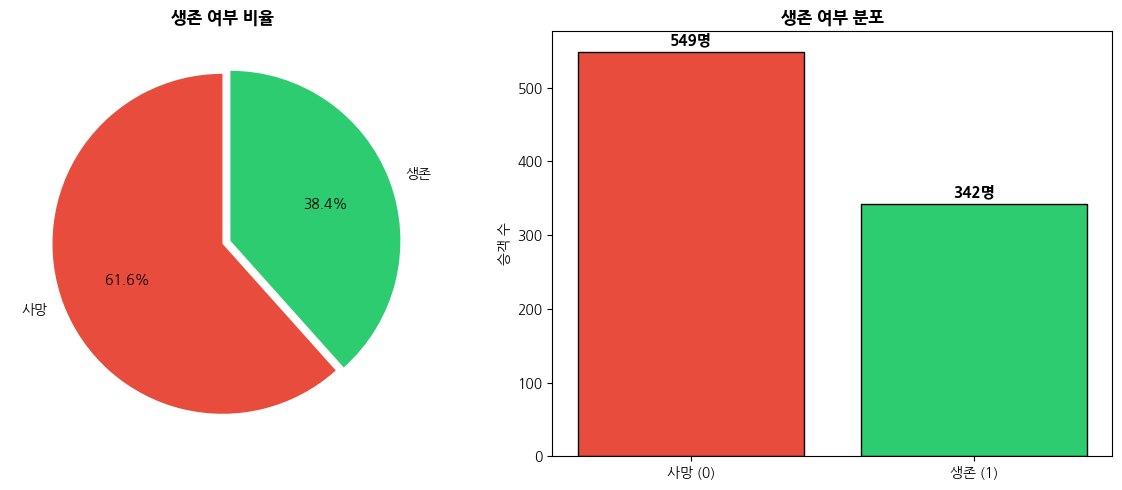

In [14]:
# 생존 여부 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 파이 차트
colors = ['#e74c3c', '#2ecc71']
axes[0].pie(survived_counts, labels=['사망', '생존'], autopct='%1.1f%%',
           colors=colors, explode=[0, 0.05], startangle=90)
axes[0].set_title('생존 여부 비율', fontsize=12, fontweight='bold')

# 막대 그래프
bars = axes[1].bar(['사망 (0)', '생존 (1)'], survived_counts, color=colors, edgecolor='black')
for bar, count in zip(bars, survived_counts):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{count}명', ha='center', fontsize=11, fontweight='bold')
axes[1].set_ylabel('승객 수')
axes[1].set_title('생존 여부 분포', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 12.3.2 성별(Sex)과 생존율

In [15]:
# 성별 분포
print("성별 분포:")
print(df['Sex'].value_counts())

성별 분포:
Sex
male      577
female    314
Name: count, dtype: int64


In [16]:
# 성별에 따른 생존율
sex_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
sex_survival.columns = ['전체', '생존자', '생존율']
sex_survival['생존율'] = (sex_survival['생존율'] * 100).round(1)
print("\n성별 생존율:")
print(sex_survival)


성별 생존율:
         전체  생존자   생존율
Sex                   
female  314  233  74.2
male    577  109  18.9


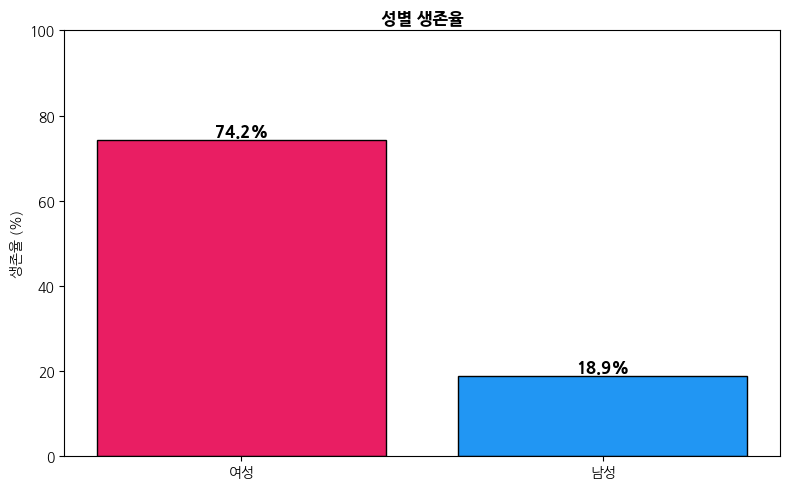

In [19]:
# 성별 생존율 계산
survival_rate = df.groupby('Sex')['Survived'].mean() * 100

# 단일 plot
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ['여성', '남성'],
    survival_rate,
    color=['#e91e63', '#2196f3'],
    edgecolor='black'
)

# 막대 위에 수치 표시
for bar, rate in zip(bars, survival_rate):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{rate:.1f}%',
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

plt.ylabel('생존율 (%)')
plt.ylim(0, 100)
plt.title('성별 생존율', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**인사이트**: 여성의 생존율(약 74%)이 남성(약 19%)보다 현저히 높습니다. "여성과 어린이 먼저" 원칙이 적용된 것으로 보입니다.

### 12.3.3 객실 등급(Pclass)과 생존율

In [20]:
# 객실 등급 분포
print("객실 등급 분포:")
print(df['Pclass'].value_counts().sort_index())

객실 등급 분포:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [21]:
# 객실 등급별 생존율
pclass_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
pclass_survival.columns = ['전체', '생존자', '생존율']
pclass_survival['생존율'] = (pclass_survival['생존율'] * 100).round(1)
print("\n객실 등급별 생존율:")
print(pclass_survival)


객실 등급별 생존율:
         전체  생존자   생존율
Pclass                
1       216  136  63.0
2       184   87  47.3
3       491  119  24.2


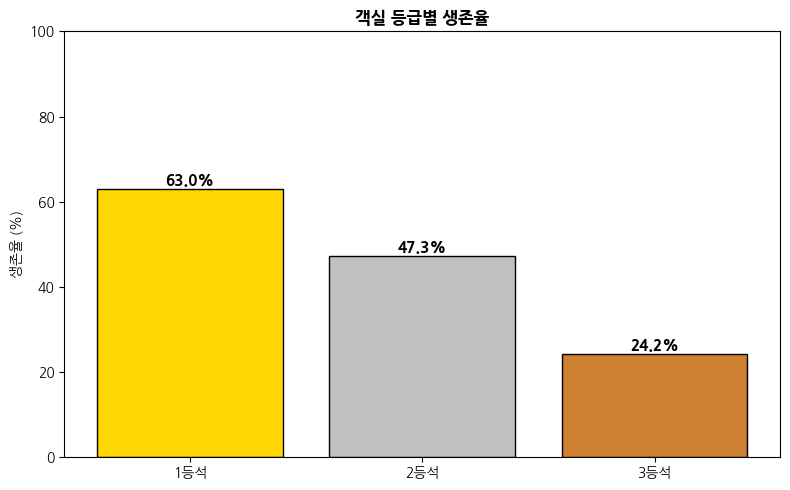

In [23]:
import matplotlib.pyplot as plt

# 등급별 생존율 계산
survival_rate = df.groupby('Pclass')['Survived'].mean() * 100

# 단일 plot
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ['1등석', '2등석', '3등석'],
    survival_rate,
    color=colors_pclass,
    edgecolor='black'
)

# 막대 위에 수치 표시
for bar, rate in zip(bars, survival_rate):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{rate:.1f}%',
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.ylabel('생존율 (%)')
plt.ylim(0, 100)
plt.title('객실 등급별 생존율', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**인사이트**: 1등석 승객의 생존율(약 63%)이 3등석(약 24%)보다 2.5배 이상 높습니다. 사회경제적 지위가 생존에 영향을 미쳤습니다.

---
## 연습문제

### 문제 1: 가족 규모와 생존율
`SibSp`(형제/배우자)와 `Parch`(부모/자녀)를 합쳐 `FamilySize` 변수를 만들고,
가족 규모에 따른 생존율을 분석하세요.

**힌트:**
- `FamilySize = SibSp + Parch + 1` (본인 포함)
- groupby로 생존율 계산
- 막대 그래프로 시각화

In [44]:
# 여기에 코드 작성

### 문제 2: 나이 구간별 생존율
나이를 다음과 같이 구간화하고, 구간별 생존율을 분석하세요.
- 0~16세: 어린이
- 17~30세: 청년
- 31~50세: 중년
- 51세 이상: 노년

**힌트:**
- `pd.cut()` 함수 사용
- 각 구간별 생존율 계산 및 시각화

In [45]:
# 여기에 코드 작성